In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Khushboo Kumari\Downloads\loan_data.csv.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.isnull().sum()
df.ffill(inplace=True)
df.bfill(inplace=True)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols =['Gender' ,'Married' ,'Education','Self_Employed' ,'Loan_Status','Property_Area']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status','Loan_ID','Dependents'], axis=1)
Y = df['Loan_Status']

x_train , x_test, y_train ,y_test = train_test_split(X,Y, test_size = 0.2 , random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train , y_train)

C:\Users\Khushboo Kumari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [27]:
from sklearn.metrics import accuracy_score ,  confusion_matrix

y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [29]:
print("Logistic Accuracy: ",accuracy_score(y_test,y_pred_lr))
print("Random Forest Accuracy: ",accuracy_score(y_test, y_pred_rf))
print("Confusion matrix (Logistic):\n ",confusion_matrix(y_test,y_pred_lr))

Logistic Accuracy:  0.8130081300813008
Random Forest Accuracy:  0.7804878048780488
Confusion matrix (Logistic):
  [[21 22]
 [ 1 79]]


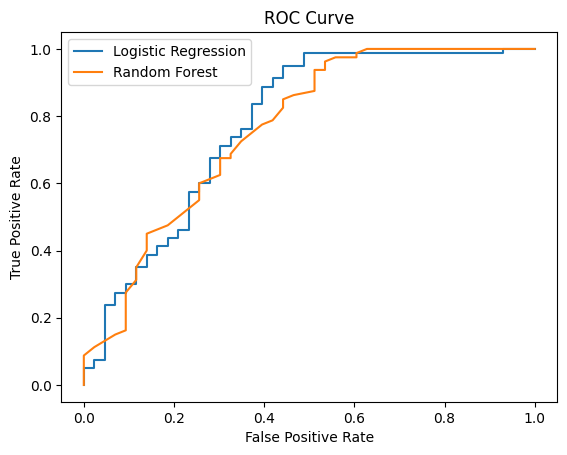

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

lr_probs = lr.predict_proba(x_test)[:,1]
rf_probs = rf.predict_proba(x_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.plot(fpr_lr , tpr_lr ,label='Logistic Regression')
plt.plot(fpr_rf , tpr_rf ,label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [36]:
print("AUC Logistic:", roc_auc_score(y_test, lr_probs))
print("AUC Random Forest:", roc_auc_score(y_test, rf_probs))


AUC Logistic: 0.7755813953488372
AUC Random Forest: 0.7625


In [37]:
import joblib
joblib.dump(rf, 'loan_model.pkl')  # or lr instead of rf
joblib.dump(lr, 'loan_model.pkl')

['loan_model.pkl']